In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2
from tensorflow import keras
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model,load_model
from tensorflow.keras.layers import Activation,Dense, Dropout, Flatten, Conv2D, MaxPooling2D,MaxPool2D,AveragePooling2D,GlobalMaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
train_data = 'C:\\MY R&A\\Digit Generation\\digit classifier\\Data\\train'
test_data = 'C:\\MY R&A\\Digit Generation\\digit classifier\\Data\\test'
categories = ['COVID19','NORMAL','PNEUMONIA']

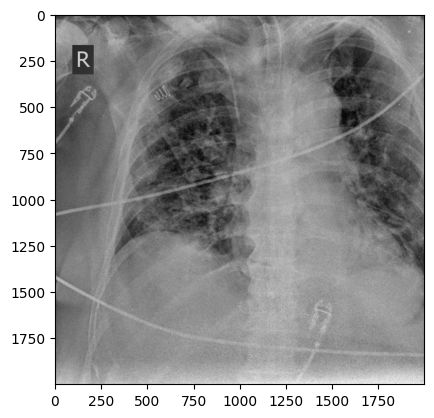

In [3]:
for category in categories:
    path = os.path.join(train_data,category)
    for image in os.listdir(path):
        image_array = cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        plt.imshow(image_array,cmap='gray')

        break
    break

In [4]:
image_array

array([[ 83,  84,  86, ..., 133, 130, 134],
       [ 88,  85,  83, ..., 131, 130, 133],
       [ 86,  86,  85, ..., 126, 125, 127],
       ...,
       [204, 201, 202, ..., 223, 226, 222],
       [209, 204, 203, ..., 221, 224, 222],
       [205, 201, 204, ..., 220, 222, 222]], dtype=uint8)

In [5]:
image_array.shape

(2000, 2000)

In [17]:
image_width, image_height = 224,224
Batch_size = 32


In [18]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_data,
    target_size=(image_width,image_height),
    batch_size=Batch_size,
    class_mode ='categorical')

test_generator = test_datagen.flow_from_directory(
    test_data,
    target_size=(image_width,image_height),
    batch_size=Batch_size,
    class_mode ='categorical')

Found 5144 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [39]:
model = Sequential(
    [
    Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(pool_size=(2,2)),
    MaxPooling2D(pool_size=(2,2)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64,(3,3),activation='relu',padding='same'),
    MaxPooling2D(pool_size=(2,2)),
    # Conv2D(128,(3,3),activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2)),
    # Conv2D(128,(3,3),activation='relu',padding='same'),
    # MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.4),
    Dense(128,activation='relu'),
    Dense(3,activation='softmax')
]
)

In [40]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,validation_data=test_generator,epochs=5)

Epoch 1/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 194s 1s/step - accuracy: 0.7031 - loss: 0.7232 - val_accuracy: 0.8975 - val_loss: 0.2876
Epoch 2/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.8755 - loss: 0.3312 - val_accuracy: 0.9200 - val_loss: 0.2433
Epoch 3/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 179s 1s/step - accuracy: 0.8879 - loss: 0.3063 - val_accuracy: 0.9247 - val_loss: 0.2160
Epoch 4/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 3421s 21s/step - accuracy: 0.8961 - loss: 0.2698 - val_accuracy: 0.9247 - val_loss: 0.2289
Epoch 5/5
161/161 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.9180 - loss: 0.2355 - val_accuracy: 0.9309 - val_loss: 0.2277


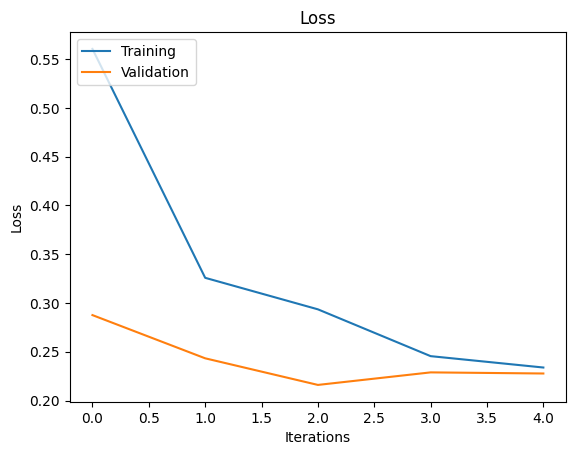

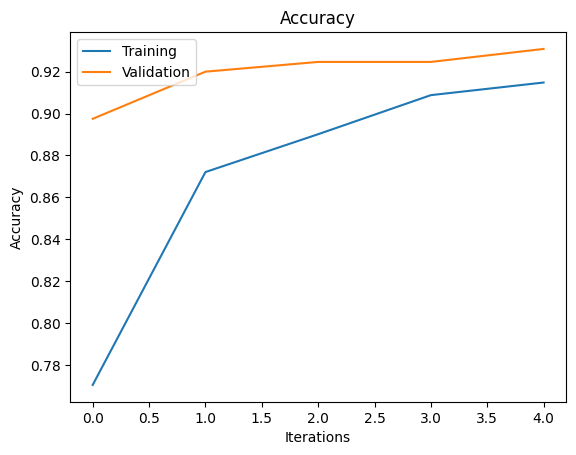

In [41]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

In [42]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_generator,validation_data=test_generator,epochs=10)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 187s 1s/step - accuracy: 0.9117 - loss: 0.2350 - val_accuracy: 0.9286 - val_loss: 0.1974
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - accuracy: 0.9349 - loss: 0.1851 - val_accuracy: 0.9061 - val_loss: 0.2714
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 182s 1s/step - accuracy: 0.9335 - loss: 0.1947 - val_accuracy: 0.9402 - val_loss: 0.1600
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 103s 637ms/step - accuracy: 0.9349 - loss: 0.1842 - val_accuracy: 0.9402 - val_loss: 0.1670
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 114s 707ms/step - accuracy: 0.9428 - loss: 0.1615 - val_accuracy: 0.9441 - val_loss: 0.1694
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 113s 701ms/step - accuracy: 0.9488 - loss: 0.1558 - val_accuracy: 0.9425 - val_loss: 0.1527
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 579ms/step - accuracy: 0.9418 - loss: 0.1645 - val_accuracy: 0.9441 - val_loss: 0.1437
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 93s 576ms/step - accuracy: 0.9416 - loss: 0.15

Tunning of data has increased the accuracy of model from 91 to 94 percentage.

#### CONFUSION MATRIX

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 239ms/step

Classification Report:
              precision    recall  f1-score   support

     COVID19       0.09      0.09      0.09       116
      NORMAL       0.21      0.23      0.22       317
   PNEUMONIA       0.66      0.64      0.65       855

    accuracy                           0.49      1288
   macro avg       0.32      0.32      0.32      1288
weighted avg       0.50      0.49      0.49      1288


 Confusion Matrix : 


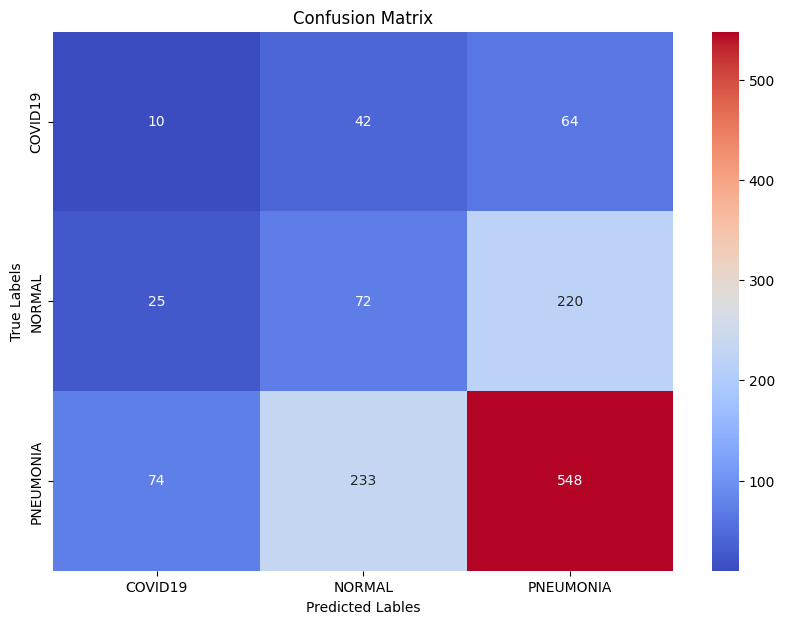

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred,axis=1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(true_labels, y_pred, target_names=class_labels))

print("\n Confusion Matrix : ")

cm = confusion_matrix(true_labels,y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot = True,fmt='d',cmap='coolwarm', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Lables')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

#### Model Summary

In [64]:
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       803,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,678,027 (10.22 MB)

 Trainable params: 892,675 (3.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,785,352 (6.81 MB)

#### Showing few Misclassified Images

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step


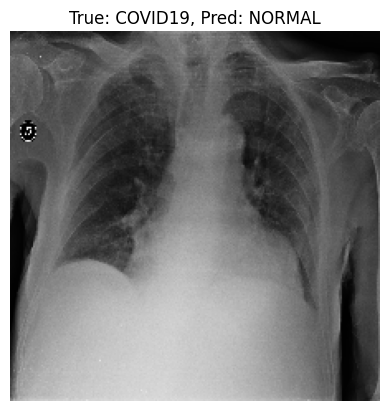

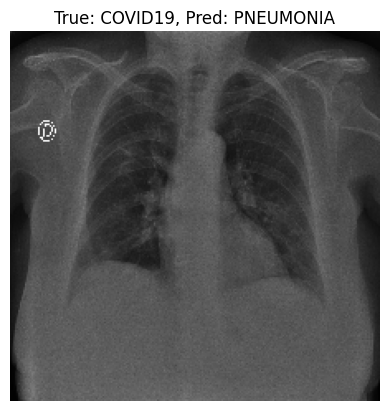

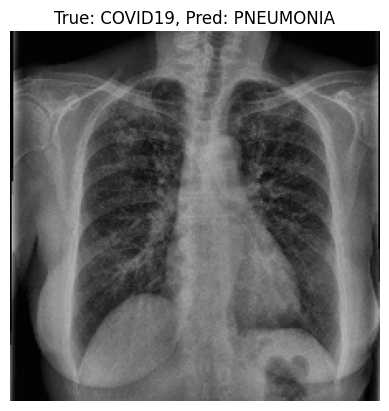

In [67]:
import matplotlib.pyplot as plt

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)
true_labels = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

misclassified_idx = np.where(y_pred != true_labels)[0]

for i in range(3): 
    idx = misclassified_idx[i]
    img_path = test_generator.filepaths[idx]
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.title(f"True: {class_labels[true_labels[idx]]}, Pred: {class_labels[y_pred[idx]]}")
    plt.axis('off')
    plt.show()


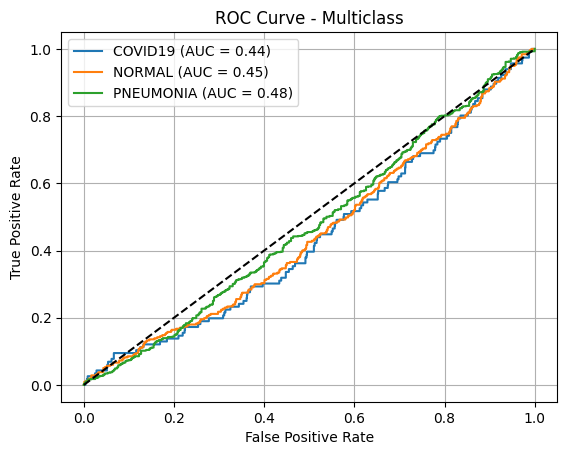

In [68]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

y_true = label_binarize(true_labels, classes=[0, 1, 2])
y_score = Y_pred

for i in range(3):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Multiclass')
plt.legend()
plt.grid()
plt.show()


#### Using ResNet50

In [69]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input

# Use the same image size as used in the generator
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze base model layers
for layer in base_model.layers:
    layer.trainable = False


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1087s 11us/step


In [70]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)


In [71]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [76]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 418s 3s/step - accuracy: 0.7080 - loss: 0.6949 - val_accuracy: 0.7446 - val_loss: 0.6262
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 338s 2s/step - accuracy: 0.7015 - loss: 0.6810 - val_accuracy: 0.7166 - val_loss: 0.6213
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 328s 2s/step - accuracy: 0.7192 - loss: 0.6577 - val_accuracy: 0.7500 - val_loss: 0.6125
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.7178 - loss: 0.6627 - val_accuracy: 0.7539 - val_loss: 0.5922
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 326s 2s/step - accuracy: 0.7170 - loss: 0.6642 - val_accuracy: 0.7632 - val_loss: 0.6096
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7079 - loss: 0.6630 - val_accuracy: 0.7539 - val_loss: 0.5723
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 324s 2s/step - accuracy: 0.7199 - loss: 0.6449 - val_accuracy: 0.7547 - val_loss: 0.5556
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step - accuracy: 0.7135 - loss: 0.6477 - val_accu

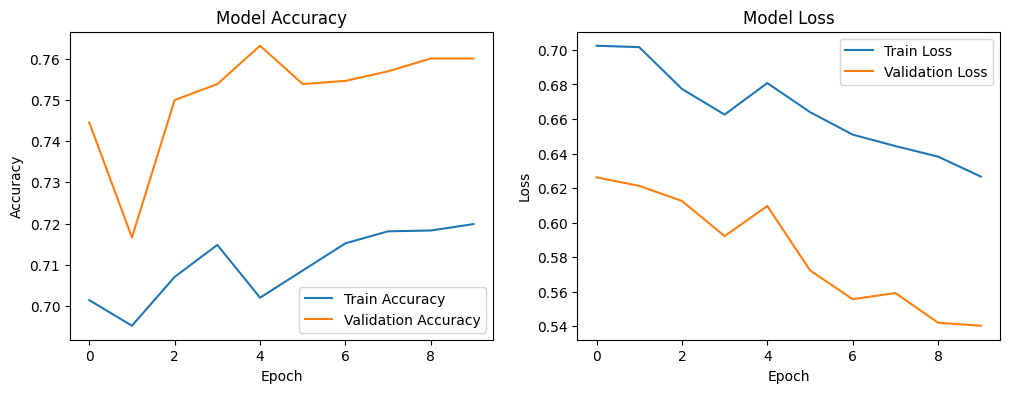

In [77]:
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
